### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Basic Image Processing Pixel to Pixel**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

Image is defined as two dimensional function *f(x,y)* where x and y are spatial (plane) coordinates, and the amplitud of *f* at any pair of coordinates (*x*, *y*) is called the intensity of the image at that point. 


#### Image processing has 3 types of computerized process:
* Low-level
    it involves in basic operations such as image preprocessing to **reduce noise**, **constrat ehancement** and image sharpening. 

    IMAGE (INPUT) -> [ OPERATIONS ] -> IMAGE (OUTPUT)
* Mid-level
    it involves tasks such as **segmentation**, **classification of individual objects**.

    IMAGE (INPUT) -> [ SPECIFIC TASK ] -> ATTRIBUTES EXTRACTED (edges, contours, and the identity of individual attributes)
* High-level

#### Photometric Tranforms:

Photometric transformations are applied to change visual appearance of an image while preserving the its geometric structure. Some photometric transformations modify image's brightness, constrast, colour or tone.


In this notebook we are going to focus in Low-level processing to this introductory activity


### Importing libraries

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [4]:
# Loading images
dog_img = Image.open('data/perrito.jpeg')

### 1. Types of Photometric Tranformation 

#### 1.1 Adjusting Brightness and Contrast

* **Brightness**: involves increasing or decreasing the intensity of the pixels. (**Beta** parameter adds brightness)
* **Contrast**: This modifies the difference between the brightness and the darkest parts of the image. (**Alpha** parameter scales contrast)


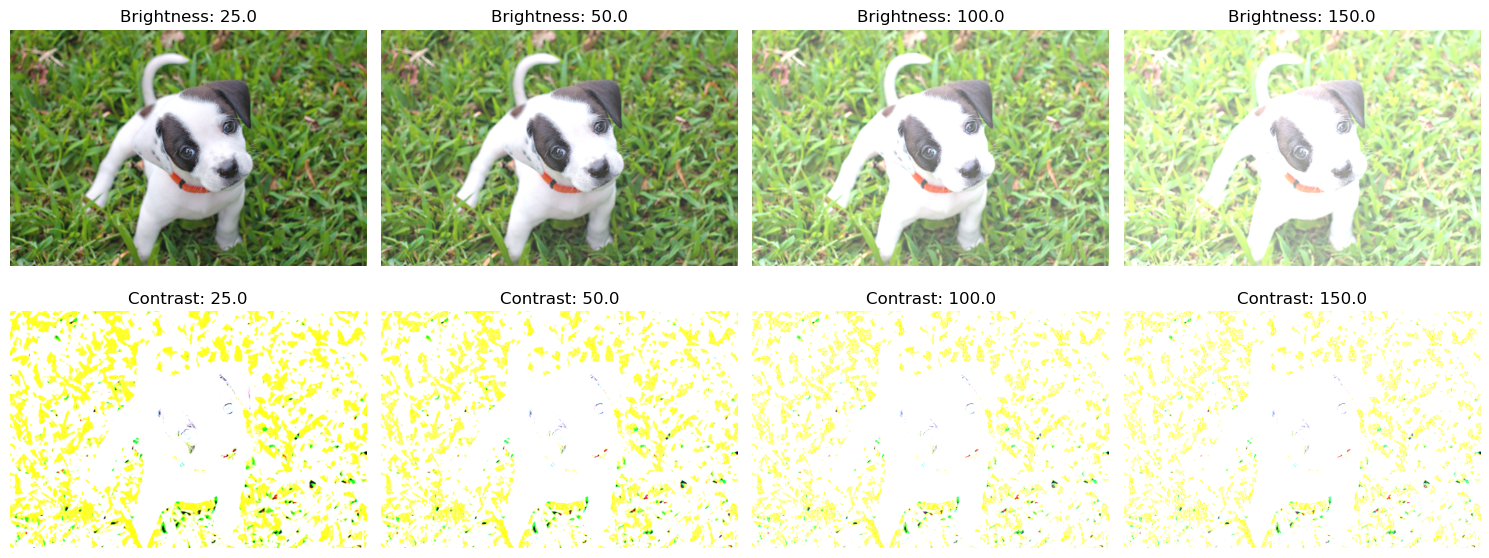

In [43]:
# anonimal function to test scales in alpha and beta
adjust_brightness_contrast = lambda img, a=1, b=0: cv2.convertScaleAbs(np.array(img), alpha=a, beta=b)
# scale of brightness and contrast
bright_scales = [25.0, 50.0, 100.0, 150.0]
contrast_scales = [2.0, 4.0, 8.0, 12.0]
# iterating the brightness dog imgs
brightness_dog_imgs = [adjust_brightness_contrast(img=dog_img, b=bright_scale) for bright_scale in bright_scales]
# iterating the contrast dog imgs
contrast_dog_imgs = [adjust_brightness_contrast(img=dog_img, a=contrast_scale) for contrast_scale in contrast_scales]

# ploting the results
fig, axs = plt.subplots(2, len(contrast_scales), figsize=(15,6))

for i, bright_img in enumerate(brightness_dog_imgs):
    axs[0, i].imshow(bright_img)
    axs[0, i].set_title(f"Brightness: {bright_scales[i]}")
    axs[0, i].axis("off")

for i, contrast_img in enumerate(contrast_dog_imgs):
    axs[1, i].imshow(contrast_img)
    axs[1, i].set_title(f"Contrast: {contrast_scales[i]}")
    axs[1, i].axis("off")
    
plt.tight_layout()
plt.show()

#### 1.2 Adjusting Contrast

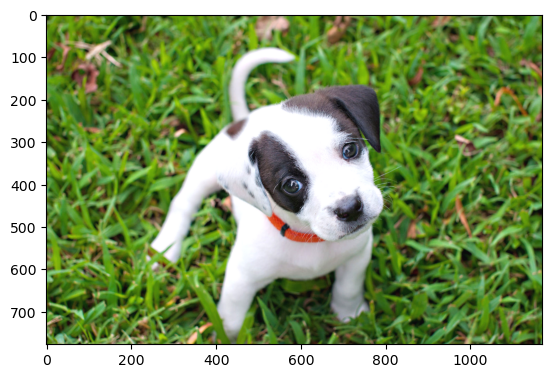

#### 1.3 Color Augmentation

### 2. Negative Images and Their Applications: A Case Study in *specify case study*

### 3. Gamma Correction and its Application: A Case Study in *specify case study*

### 4. Image substraction and its Application: A Case Study in *specify case study*

### References
[1] Smith, J., & Doe, A. (2020). *Title of the Paper*. Journal Name, Volume(Issue), pages. [DOI or URL](https://doi.org/example).

[2] Illustration of transforms — Torchvision main documentation. (2017). [https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#:~:text=Photometric%20image%20transformation%20refers%20to,while%20preserving%20its%20geometric%20structure].
